<a href="https://colab.research.google.com/github/divyani95/Crypto/blob/main/naive_bayes_classifier_for_diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# loading the diabetes dataset to a pandas DataFrame
from google.colab import files
uploaded = files.upload()

Saving Healthcare-Diabetes.csv to Healthcare-Diabetes.csv


In [5]:
df = pd.read_csv('Healthcare-Diabetes.csv')


In [6]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.tail()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [8]:
df.shape

(2768, 10)

In [9]:
df.ndim

2

In [10]:
df.columns.tolist()

['Id',
 'Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [11]:
df.isnull().sum()

,0
Id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Assuming the target column is named 'Outcome' (adjust as per the actual column name)
target_correlation = correlation_matrix['Outcome'].abs().sort_values(ascending=False)

# Print the sorted correlations with the target column
print(target_correlation)


Outcome                     1.000000
Glucose                     0.460644
BMI                         0.280928
Age                         0.237050
Pregnancies                 0.223796
DiabetesPedigreeFunction    0.160664
Insulin                     0.123646
SkinThickness               0.075603
BloodPressure               0.072900
Id                          0.006298
Name: Outcome, dtype: float64


# Define X And Y Variable

In [16]:
x = df[['Glucose', 'BloodPressure']]


In [18]:
y = df['Outcome']


# Division Dataset into Training and Testing Data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=800,random_state=42)

# Check The Shape of X_train and Y_test

In [21]:
#means how much data present in training and testing set
x_train.shape,x_test.shape

((800, 2), (1968, 2))

# Feature Engineering

In [22]:
x_train.dtypes

,0
Glucose,int64
BloodPressure,int64


# Display Numerical Values

In [23]:
num = [col for col in x_train.columns if x_train[col].dtypes != 'O']

In [24]:
print(num)

['Glucose', 'BloodPressure']


In [25]:
x_train[num].isnull().sum() #missing values


,0
Glucose,0
BloodPressure,0


In [26]:
x_train.head()

,Glucose,BloodPressure
2134,96,64
842,79,75
1373,124,60
2341,89,90
2116,111,62


In [27]:
x_test.head()

,Glucose,BloodPressure
1378,106,54
839,139,64
2164,164,84
2619,101,76
927,163,72


# Feature Scaling

In [28]:
cols = x_train.columns

In [29]:
from sklearn.preprocessing import RobustScaler

In [30]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)

In [31]:
x_test = scaler.transform(x_test)

In [32]:
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])

In [33]:
x_train.head()

,Glucose,BloodPressure
0,-0.488889,-0.5000
1,-0.866667,0.1875
2,0.133333,-0.7500
3,-0.644444,1.1250
4,-0.155556,-0.6250


# Model Train ["Naive Bayes Model"]

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
naive=GaussianNB()

# Fit The Model

In [36]:
naive.fit(x_train,y_train)

GaussianNB()

# Predict The Result  [check the classifier]

In [37]:
y_pred=naive.predict(x_test)

In [38]:
print(y_pred)

[0 0 1 ... 1 0 1]


# #check Accuracy Score

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7571


# Compare The Accuracy of Train and Test Set

In [41]:
y_pred_train=naive.predict(x_train)

In [42]:
print(y_pred_train)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0
 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0
 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 

In [43]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7388


# Check for Overfitting and Underfitting

In [44]:
print('Training set score: {:.4f}'.format(naive.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(naive.score(x_test, y_test)))

Training set score: 0.7388
Test set score: 0.7571


# check distribution of test set

In [45]:
y_test.value_counts()

,count
Outcome,
0,1295
1,673


# Null Accuracy

In [46]:
null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


# Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix

In [49]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1170  125]
 [ 353  320]]


In [50]:
# Print the Confusion Matrix and slice it into four pieces
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  1170

True Negatives(TN) =  320

False Positives(FP) =  125

False Negatives(FN) =  353


<Axes: >

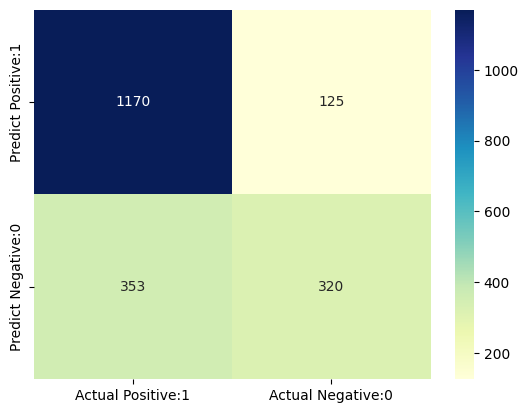

In [51]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Calculate Correct Predictions,

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

In [54]:
correct_predictions = tp + tn
false_positives = fp
false_negatives = fn

In [55]:
print("Correct predictions:", correct_predictions)
print("False positives:", false_positives)
print("False negatives:", false_negatives)

Correct predictions: 1490
False positives: 125
False negatives: 353
